## Building Analysis Reports for Players

In [1]:
from fpdf import FPDF
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.ticker as tkr
import numpy as np
import seaborn as sns 
import pandas as pd
import io
from PIL import Image

In [2]:
#Establishing connection to py_ball
HEADERS = {'Connection': 'keep-alive',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'x-nba-stats-token': 'true',
           'Accept-Language': 'en-US,en;q=0.9',
           "X-NewRelic-ID": "VQECWF5UChAHUlNTBwgBVw==",
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)' +\
                         ' AppleWebKit/537.36 (KHTML, like Gecko)' + \
                         ' Chrome/81.0.4044.129 Safari/537.36'}

In [3]:
#Read in shot chart
shot_chart = pd.read_csv(r'C:\Users\nmani\OneDrive\Desktop\shotchart.csv')

In [4]:
#Create Shotchart for player
class ShotCharts:
        def __init__(self) -> None:
                pass
        
        def create_court(ax: plt.axes, color="Black") -> plt.axes:
                """ Create a basketball court in a matplotlib axes
                """
                # Short corner 3PT lines
                ax.plot([-220.5,-220], [0, 140], linewidth=2, color=color)
                ax.plot([220, 220], [0, 140], linewidth=2, color=color)
                # 3PT Arc
                ax.add_artist(Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
                # Lane and Key
                ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
                ax.plot([80, 80], [0, 190], linewidth=2, color=color)
                ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
                ax.plot([60, 60], [0, 190], linewidth=2, color=color)
                ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
                ax.add_artist(Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
                ax.plot([-250, 250], [0, 0], linewidth=2, color='Black')
                # Rim
                ax.add_artist(Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
                # Backboard
                ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
                # Remove ticks
                ax.set_xticks([])
                ax.set_yticks([])
                # Set axis limits
                ax.set_xlim(-250, 250)
                ax.set_ylim(0, 470)
                return ax

        
        def volume_chart(df: pd.DataFrame, name: str, season=None, 
                        RA=True,
                        extent=(-250, 250, 422.5, -47.5),
                        gridsize=25, cmap="Blues"):
                fig = plt.figure(figsize=(3.6, 3.6), facecolor='gainsboro', edgecolor='gainsboro', dpi=100)
                ax = fig.add_axes([0, 0, 1, 1], facecolor='gainsboro')

                # Plot hexbin of shots
    
                x = df.LOC_X
                y = df.LOC_Y + 60
                makes = df.SHOT_MADE_FLAG == 1 
                # Annotate player name and season
                plt.text(-225, 430, f"{name}", fontsize=21, color='Black',
                                fontname='Corbel')
                plt.text(-225, 400, "Shot Selection Volume", fontsize=12, color='Black',
                                fontname='Corbel')
                season = f"{season[0][:4]}-{season[-1][-2:]}"
                plt.text(-250, -20, season, fontsize=8, color='Black')
                plt.text(110, -20, '@neilmaniar3', fontsize=8, color='Black')

                hexbin = ax.hexbin(x, y, cmap=cmap,
                        bins="log", gridsize=25, mincnt=2, extent=(-250, 250, 422.5, -47.5))
                
                
               
                values = hexbin.get_array()
                
                mx = values.max()
                mn = values.min()
               

                # Draw court
                ax = ShotCharts.create_court(ax, 'black')

                # add legend
                
                cax = fig.add_axes([0.85, 0.65, 0.05, 0.3]) 
                cbar = fig.colorbar(hexbin,cax=cax)
               
                cbar.set_ticks([mn,mx])
                cbar.set_ticklabels(['Low','High'])
                cbar.ax.tick_params(rotation=90)
               
                
                return fig

In [9]:
title = 'Player Evaluation: Coby White'
class PDF(FPDF):
    def header(self):
        self.set_font('Arial','B',15)
        self.set_fill_color(168, 66, 50)
        
        self.cell(400,20,txt=title,border=0,ln=0,align='',fill = True)
        
        self.set_y(10)
        #self.set_fill_color(19, 144, 161)
        self.set_font('Arial','',10)
        self.cell(400,10,txt='Point Gaurd',border=0,ln=0,align='',fill = False)
    #def shot_chart(self):

     #   self.image('http://localhost:8888/view/shotvolume_plot.png',5,200)
        
        
        
        
    def footer(self):
        #Position at 1.5cm from the bottom
        self.set_y(-10)
        #font
        self.set_font('Arial','B',10)
        self.set_fill_color(255, 255, 255)
        #title
        self.cell(0,6,'@nmaniar3',0,1,'L',1)
        self.ln(4)


        
        
        

In [10]:
pdf = PDF(orientation = 'L', unit='mm', format='A4')
pdf.set_margins(0,0,0)



pdf.output('test.pdf','F')

C:\Users\nmani\AppData\Local\Temp\ipykernel_22172\152491540.py:6: DeprecationWarning: "dest" parameter is deprecated, unused and will soon be removed
  pdf.output('test.pdf','F')
C:\Users\nmani\AppData\Local\Temp\ipykernel_22172\1162232581.py:4: UserWarning: Substituting font arial by core font helvetica
  self.set_font('Arial','B',15)
C:\Users\nmani\AppData\Local\Temp\ipykernel_22172\1162232581.py:7: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  self.cell(400,20,txt=title,border=0,ln=0,align='',fill = True)
C:\Users\nmani\AppData\Local\Temp\ipykernel_22172\1162232581.py:11: UserWarning: Substituting font arial by core font helvetica
  self.set_font('Arial','',10)
C:\Users\nmani\AppData\Local\Temp\ipykernel_22172\1162232581.py:12: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  self.cell(400,10,txt='Point Gaurd',border=0,ln=0,align='',fill = False)
C:\Users\nman

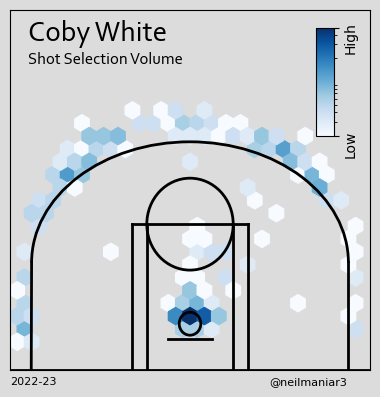

In [11]:
temp = shot_chart[shot_chart['PLAYER_NAME']=='Coby White']
name = 'Coby White'
seasons = ['2022-23']
chart1 = ShotCharts.volume_chart(temp,name, seasons)
#plt.show()
plt.savefig('shotvolume_plot.png')

C:\Users\nmani\AppData\Local\Temp\ipykernel_23784\89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [72]:
pdf.image('http://localhost:8888/view/shotvolume_plot.png')

RuntimeError: FPDF error: Not a PNG file: http://localhost:8888/view/shotvolume_plot.png